# Grade: 100 points

# Assignment 01: Linear Regression

## Instructions

#### Follow These Steps before submitting your assignment 

1. Complete the notebook.

2. Make sure all plots have axis labels.

3. Once the notebook is complete, `Restart` your kernel by clicking 'Kernel' > 'Restart & Run All'.

4. Fix any errors until your notebook runs without any problems.

5. Submit one completed notebook for the group to OWL by the deadline.

6. Please note, a random seed of 42 needs to be set to ensure the reproducability of the results -- *DO NOT* change this random seed. **If you call additional functions that are based on random number generators, you will need to define their seed to 42 as well**. 

7. Make sure to reference all external code and documentation used.


# Q1 - Data Loading and Exploration

`Dataset_Assignment1.csv` lists the soccer players participated in the 2022 FIFA World Cup. Our ultimate goal is to find the best ML model among three candidates that can best predict a player's monetary "Value". The dataset has the following attributes:

Age: Player age in years
Nationality: Players nationality
Overall: Player overall performance score (higher better)
Potential: Player potential score (higher better)
Club: Player home soccer club
Value: Player value i.e, the amount of money a club should pay in order to purchase the player (higher better)
Wage: Player stipend (higher better)
Preferred Foot: Player preferred foot to play
International Reputation: Player international fame (higher better)
Week Foot: Performance score of player weak foot (higher better)
Skill Moves: Player move skill score (higher better)
Body Type: Player body type
Position: Position player holds on the pitch
Height: Player height in CM
Weight: Player weight in kg

1. Load the dataset.
2. Display basic statistics and inspect for missing data.
3. Visualize the distribution of numerical columns.
4. **Discussion Question:** Why is it important to explore and visualize the data before building any models? What types of trends or problems could you uncover at this stage?

In [ ]:
# Answer to Q1.1 
import matplotlib.pyplot as plt
import pandas as pd 

player_data = pd.read_csv('Dataset_Assignment1.csv')

In [ ]:
# Answer to Q1.2
print(player_data.head())
print(player_data.describe())

In [ ]:
# Answer to Q1.3
player_data.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

**Answer to Q1.4**: It's important to explore and visualize our data because it gives us a better sense of the data we're looking at, we can see errors early, and spot patterns from the right from the jump. We can see a lot of different trends such as missing data, outliers, skewed distributions, and other patterns in the data (linear/non-linear) which can help us in creating a more appropriate model.


# Q2 - Feature extraction

1. Plot the joint distribution between `Weight` and `Height`.
2. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m². With this knowledge, see if you can do some meaningful feature extraction and then drop Weight and Height. 

In [ ]:
# Answer to Q2.1
player_data.plot(x='Weight', y='Height', kind="scatter")
plt.title("Player Weight vs. Height")
plt.show()

In [ ]:
# Answer to Q2.2
# Creating a new column to show player BMI 
player_data['Height_m'] = player_data['Height'] / 100
player_data['BMI'] = player_data['Weight'] / (player_data['Height_m'] ** 2)
print(player_data[['Weight', 'Height', 'BMI']].head())
player_data = player_data.drop(columns=['Weight', 'Height', 'Height_m'])
print(player_data.head())

# Q3 - Correlation and Feature Selection

1. Compute correlation between numerical features.
2. Visualize correlations using a heatmap to identify highly correlated features.
3. Choose the most correlated feature with the target variable (`Value`) for simple linear regression.
4. **Discussion Question:** How do you interpret a correlation value? Does a higher correlation always mean a feature is more important?

In [ ]:
# Answer to Q3.1
# Compute correlation matrix
corr_matrix = player_data.corr(numeric_only=True)

# Show correlations with the target variable 'Value'
print(corr_matrix['Value'].sort_values(ascending=False))

In [ ]:
# Answer to Q3.2
plt.matshow(corr_matrix, cmap="coolwarm")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.gca().xaxis.set_ticks_position("bottom")
plt.title("Correlation Heatmap", pad=20)
plt.colorbar()
plt.show()

In [ ]:
# Answer to Q3.3
target_corr = corr_matrix["Value"].drop("Value")  # exclude self-correlation
most_corr_feature = target_corr.abs().idxmax()    # feature with highest absolute correlation
print("Most correlated feature with Value:", most_corr_feature)
print("Correlation:", target_corr[most_corr_feature])

**# Answer to Q3.4**: It's my understanding that the closer a correlation is to 1 or -1 the stronger the relationshhip between the variables. A postive correlation means the values are proportional and a negative correlation means they are inversely proportional. A higher correlation doesnt always mean a feature is more important, for example this is only measuring linear relationships.

# Q4 - Data Normalization & Simple Linear Regression

1. Select one highly correlated numerical feature and build a simple linear regression model to predict the target variable.
2. Split the data into 80% training and 20% test sets (use the random seed of 42). 
3. Normalize the dataset.
4. Rebuild the simple linear regression model with normalized data.
5. Compare the normalized and non-normalized data visually. 
6. Compare performance of the normalized and non-normalized models visually and using R² and RMSE.
7. **Discussion Question:** Why might normalizing data improve model performance? In which situations might normalization not be beneficial?
8. Visualize the relationship between the selected feature and the predicted target variable.
9. **Discussion Question:** What could cause a simple linear regression model to perform poorly, even if the correlation is high?

In [ ]:
# Answer to Q4.1
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Select feature (Wage) and target (Value)
X = player_data[["Wage"]]   # Predictor
y = player_data["Value"]    # Target

# Build and train model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)


In [ ]:
# Answer to Q4.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train model
modelSplit = LinearRegression()
modelSplit.fit(X_train, y_train)

# Predictions
y_pred = modelSplit.predict(X_test)

# Performance
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Coefficients
print("Intercept:", modelSplit.intercept_)
print("Coefficient (slope):", modelSplit.coef_[0])

# Plot
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression line")
plt.xlabel("Wage")
plt.ylabel("Value")
plt.title("Simple Linear Regression with Split")
plt.legend()
plt.show()


In [ ]:
# Answer to Q4.3
# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Answer to Q4.4
# Rebuild model with normalized data
model_norm = LinearRegression()
model_norm.fit(X_train_scaled, y_train)

# Predictions
y_pred_norm = model_norm.predict(X_test_scaled)

# Performance
r2_norm = r2_score(y_test, y_pred_norm)
rmse_norm = np.sqrt(mean_squared_error(y_test, y_pred_norm))


In [ ]:
# Answer to Q4.5
# Scatter plots of actual vs predicted
plt.figure(figsize=(12,5))

# Non-normalized
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
plt.xlabel("Wage")
plt.ylabel("Value")
plt.title("Non-normalized Regression")
plt.legend()

# Normalized (plotting with scaled X for regression line)
plt.subplot(1, 2, 2)
plt.scatter(X_test_scaled, y_test, color="blue", label="Actual (scaled X)")
plt.plot(X_test_scaled, y_pred_norm, color="red", linewidth=2, label="Predicted")
plt.xlabel("Wage (scaled)")
plt.ylabel("Value")
plt.title("Normalized Regression")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Answer to Q4.6
print("Non-normalized Model")
print("R²:", r2)
print("RMSE:", rmse)
print("\n")
print("\nNormalized Model")
print("R²:", r2_norm)
print("RMSE:", rmse_norm)

**# Answer to Q4.7**: Normalizing that data can help when dealing with multiple features and these features having widely varied scales as the goal of normalizing is to scale the features so no single feature skews the model due to its high magnitude. Normalization is practically useless when dealing with one feature as all we're doing is expressing the predicition line in a different scale. The relationship between the feature and target is the same.


Intercept: 31552853.687482715
Coefficient (slope): 292.84977869207876


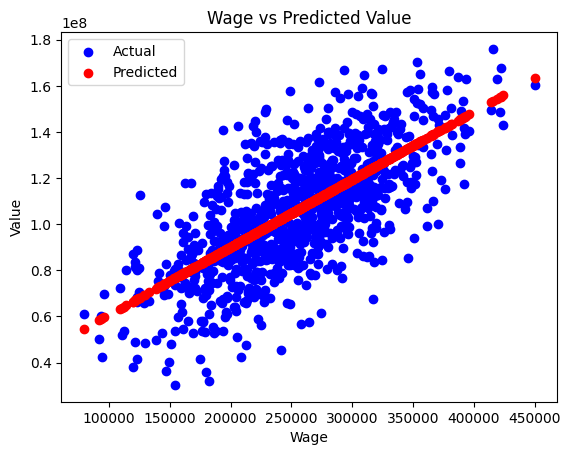

In [82]:
# Answer to Q4.8
# Coefficients
print("Intercept:", model.intercept_)
print("Coefficient (slope):", model.coef_[0])

# Plot
plt.scatter(X_test.values.ravel(), y_test, color="blue", label="Actual")
plt.scatter(X_test.values.ravel(), y_pred, color="red", label="Predicted")
plt.xlabel("Wage")
plt.ylabel("Value")
plt.title("Wage vs Predicted Value")
plt.legend()
plt.show()

**# Answer to Q4.9**: Poor data can make a model perform poorly for example if there were measurment errors or bias. Outliers can also distort the regression line leading to poor predictions for a magority of the data points. Also since we're only using one variable we're failing to put into consideration other features that are influencing the actual values leading to poor predicitions.



# Q 5 - Multiple Linear Regression

1. Select numerical features with correlation above certain thresholds (e.g., 0.2, 0.4, and 0.6).
2. Build three different multiple linear regression models using different sets of features based on correlation thresholds.
3. Evaluate and compare these models using R² and RMSE.
4. **Discussion Question:** How do we decide which features to include in a multiple linear regression model? What challenges might arise from using too many features?

In [ ]:
# Answer to Q5.1

In [ ]:
# Answer to Q5.2

In [ ]:
# Answer to Q5.3

**# Answer to Q5.4**: 

# Q6 - Model Evaluation and Comparison

1. Compare all models (simple and multiple regression models) by printing there R² and RMSE values.
2. **Discussion Question:** Which model performs the best and why?
3. **Discussion Question:** If a model has a high R² value but a large RMSE, what might that indicate about the model's performance?
4. **Discussion Question:** Discuss next steps or potential improvements to the models.

In [ ]:
print(f"SLR_model -> R²: {r2_SLR_model_scaled:.4f}, RMSE: {rmse_SLR_model_scaled:.4f}")
print(f"MLR_model_4features -> R²: {r2_0_2:.4f}, RMSE: {rmse_0_2:.4f}")
print(f"MLR_model_3features -> R²: {r2_0_4:.4f}, RMSE: {rmse_0_4:.4f}")
print(f"MLR_model_1features -> R²: {r2_0_6:.4f}, RMSE: {rmse_0_6:.4f}")

In [ ]:
# Answer to Q6.1

**Answer to Q6.2**: 

**Answer to Q6.3**: 

**Answer to Q6.4**: 

# Q7 - GenAI

1. **Discussion Question:** Did you use GenAI and if so, how?
2. **Discussion Question:** What limitations did you encounter and how did you overcome them?

**Answer to Q7.1**: 

**Answer to Q7.2**: 